In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

In [2]:
results_file = 'results.json'

In [3]:
with open(results_file, 'r') as f_handle:
    results = json.load(f_handle)


In [4]:
scopes = list(results.keys())
llms = ['mistralai/mistral-7b-instruct', 'openai/gpt-3.5-turbo']

In [5]:
[[results[scope][llm]['details'] for scope in scopes] for llm in llms]

[[{'bleu_scores': '[0, 0.25, 0.2, 0, 0.2, 0, 0.25, 0.25, 0, 0.2, 0, 0, 0, 0.25, 0.25, 0.25, 0.10000000000000002, 0, 0, 0]',
   'did_pass': [False,
    True,
    True,
    False,
    True,
    False,
    True,
    True,
    False,
    True,
    False,
    False,
    False,
    True,
    True,
    True,
    True,
    False,
    False,
    False],
   'faithfulness_scores': '[0.0, 0.0, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4912188798189163, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]',
   'hallucination_score': '[0.9957514, 0.02822792, 0.04203446, 0.02586521, 0.9882577, 0.8895889, 0.02822792, 0.02822792, 0.10239307, 0.04203446, 0.02822792, 0.02586521, 0.9957514, 0.9957514, 0.02822792, 0.02822792, 0.10239307, 0.04203446, 0.20947951, 0.02822792]',
   'quazi_exact_score': '[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]',
   'questions': [{'answers': ['portside'],
     'context_image_path': '/workspaces/navreas-dataset/questions/spatial_relatio

In [6]:

bleu_scores = [[json.loads(results[scope][llm]['details']['bleu_scores']) for scope in scopes] for llm in llms]
hallucination_scores = [[json.loads(results[scope][llm]['details']['hallucination_score']) for scope in scopes] for llm in llms]
quazi_exact_scores =  [[json.loads(results[scope][llm]['details']['quazi_exact_score']) for scope in scopes] for llm in llms]   
faithfulness_scores = [[json.loads(results[scope][llm]['details']['faithfulness_scores']) for scope in scopes] for llm in llms]   

In [59]:
# Flatten the lists and add each score type to a dictionary
bleu_scores_flat = [score for sublist in bleu_scores for item in sublist for score in item]
print(len(bleu_scores_flat))

hallucination_scores_flat = [score for sublist in hallucination_scores for item in sublist for score in item]
print(len(hallucination_scores_flat))

quazi_exact_scores_flat = [score for sublist in quazi_exact_scores for item in sublist for score in item]
print(quazi_exact_scores_flat)

faithfulness_scores_flat = [score for sublist in faithfulness_scores for item in sublist for score in item]
print(len(faithfulness_scores_flat))


40
40
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
40


In [60]:
[llm for llm in llms for _ in range(len(bleu_scores_flat))] 
print(bleu_scores_flat)
print([len(item) for sublist in bleu_scores for item in sublist ])
print(len([llm for llm in llms for _ in range(20)]*3))
print(faithfulness_scores_flat)

[0, 0.25, 0.2, 0, 0.2, 0, 0.25, 0.25, 0, 0.2, 0, 0, 0, 0.25, 0.25, 0.25, 0.10000000000000002, 0, 0, 0, 0, 1.0, 0.25, 0, 1.0, 0, 0, 0, 0.25, 0.25, 0, 0, 0, 1.0, 0, 0, 1.0, 0.25, 0, 0]
[20, 20]
120
[0.0, 0.0, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4912188798189163, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9726773758884519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9726773758884519, 0.9726773758884519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


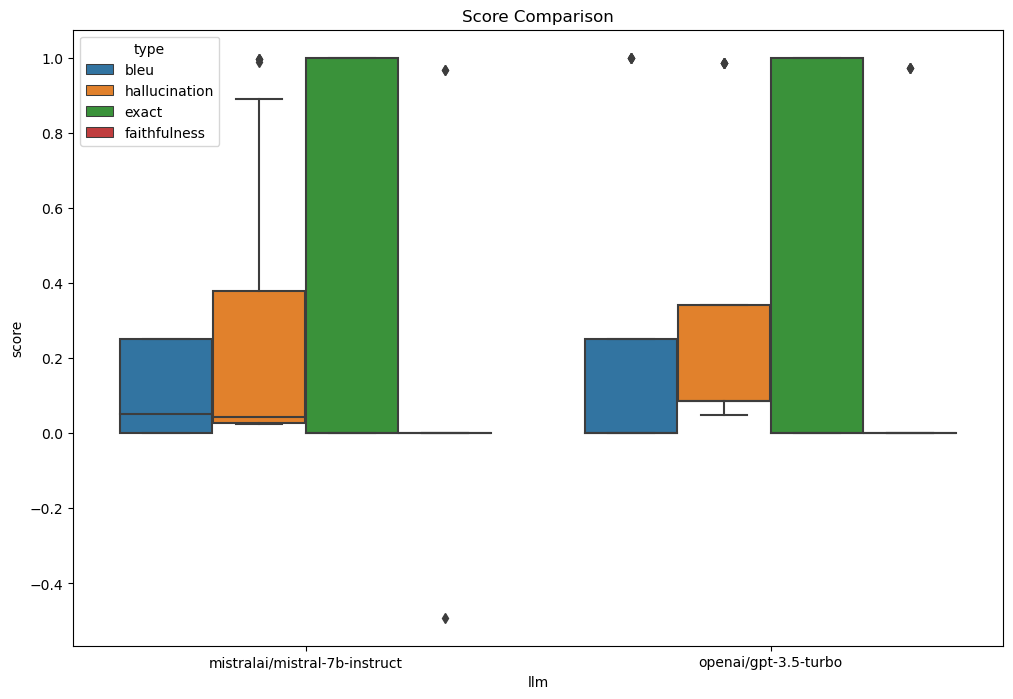

In [61]:
data = {
    "llm": [llm for llm in llms for _ in range(20)]*4, 
    "score": bleu_scores_flat + hallucination_scores_flat + quazi_exact_scores_flat + faithfulness_scores_flat,
    "type": ['bleu']*len(bleu_scores_flat) + ['hallucination']*len(hallucination_scores_flat)  + ['exact']*len(quazi_exact_scores_flat) + ['faithfulness']*len(faithfulness_scores_flat)
}

# Create DataFrame
df = pd.DataFrame(data)
# Then create a grouped boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='llm', y='score', hue='type', data=df)
plt.title('Score Comparison')
plt.show()

                              llm           type     score  counts
0   mistralai/mistral-7b-instruct           bleu  0.000000      10
1   mistralai/mistral-7b-instruct           bleu  0.100000       1
2   mistralai/mistral-7b-instruct           bleu  0.200000       3
3   mistralai/mistral-7b-instruct           bleu  0.250000       6
4   mistralai/mistral-7b-instruct          exact  0.000000      11
5   mistralai/mistral-7b-instruct          exact  1.000000       9
6   mistralai/mistral-7b-instruct   faithfulness -0.491219       1
7   mistralai/mistral-7b-instruct   faithfulness  0.000000      17
8   mistralai/mistral-7b-instruct   faithfulness  0.967752       2
9   mistralai/mistral-7b-instruct  hallucination  0.025865       2
10  mistralai/mistral-7b-instruct  hallucination  0.028228       7
11  mistralai/mistral-7b-instruct  hallucination  0.042034       3
12  mistralai/mistral-7b-instruct  hallucination  0.102393       2
13  mistralai/mistral-7b-instruct  hallucination  0.209480    

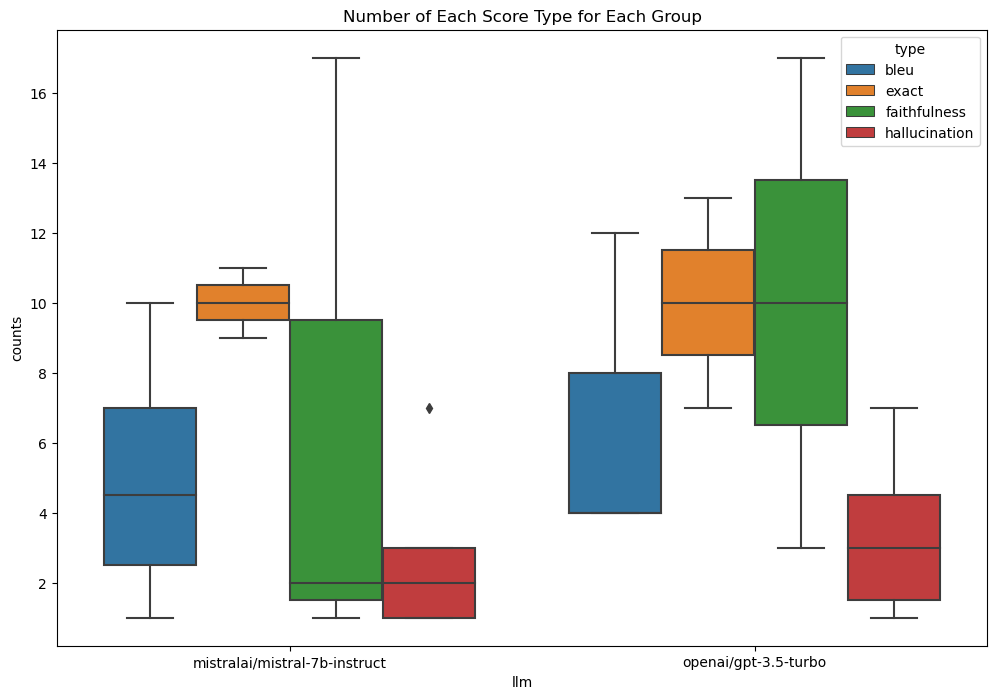

In [63]:
# Group by 'llm' and 'type', and count the scores
grouped_df = df.groupby(['llm', 'type', 'score']).size().reset_index(name='counts')
print(grouped_df)
# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='llm', y='counts', hue='type', data=grouped_df)
plt.title('Number of Each Score Type for Each Group')
plt.show()